### Distance Based Classifier Algorithm
### 5 Qubits
### Dr.Ashraf Abozied
### 1 st Version
### 3-07-2020

In [5]:
print('\ndistance_based_classifier Algorithm')
print('------------------\n')
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute,IBMQ, BasicAer
# import basic plot tools
from qiskit.visualization import plot_histogram
import math
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
pi = math.pi


distance_based_classifier Algorithm
------------------



Credentials are already in use. The existing account in the session will be replaced.


In [6]:
q = QuantumRegister(5,'q')
c = ClassicalRegister(1,'c')
cl = QuantumCircuit(q,c)
#prepare states
cl.h(q[0])
cl.h(q[1])
cl.barrier(q)
cl.cu3(4.304, 0, 0, q[0], q[1])
cl.x(q[0])
cl.ccx(q[0], q[1], q[2])
cl.x(q[1])
#begin controlled-controlled u3
cl.barrier(q)
cl.cx(q[1], q[2])
cl.u3(-0.331, 0, 0, q[2])
cl.ccx(q[0], q[1], q[2])
cl.cx(q[1], q[2])
cl.u3(-0.331, 0, 0, q[2])
cl.cx(q[1], q[2])
cl.u3(0.331, 0, 0, q[2])
#end controlled-controlled u3
cl.barrier(q)
cl.swap(q[2],q[3])
cl.cx(q[2],q[1])
cl.h(q[0])
cl.barrier(q)

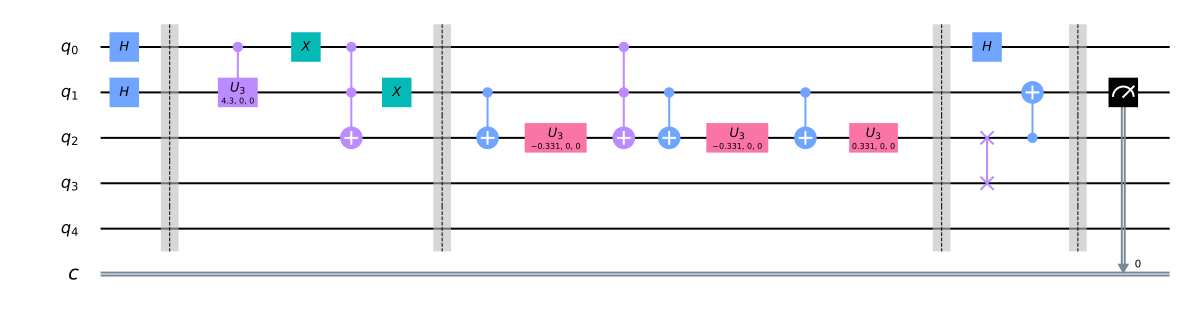

In [7]:
#measure qbits
cl.measure(q[1],c[0])
#cl.measure(q[3],c[0])
#Draw Circuit
cl.draw(output='mpl')

In [8]:
#running
backend = provider.get_backend('ibmq_qasm_simulator')
print('\nExecuting job....\n')
job = execute(cl, backend, shots=1000)
result = job.result()
counts = result.get_counts(cl)
print('RESULT: ',counts,'\n')
#print('Press any key to close')
#input()


Executing job....

RESULT:  {'0': 246, '1': 754} 



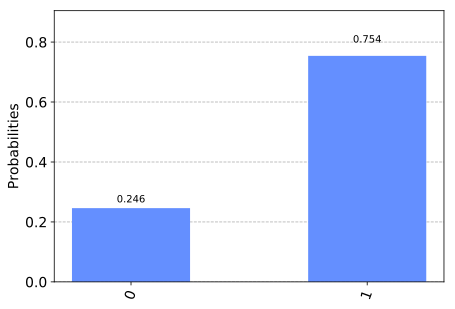

In [9]:
%config InlineBackend.figure_format = 'svg' # Image formatting again
plot_histogram(counts)